In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "../output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

584


In [3]:
#  Perform API Calls

# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
# Base URL to work off     
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | hirtshals.
Processing Record 1  of Set 1 | hasaki.
Processing Record 2  of Set 1 | hilo.
Processing Record 3  of Set 1 | ushuaia.
Processing Record 4  of Set 1 | demmin.
Processing Record 5  of Set 1 | busselton.
Processing Record 6  of Set 1 | punta arenas.
Processing Record 7  of Set 1 | puerto ayora.
Processing Record 8  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 9  of Set 1 | tiksi.
Processing Record 10  of Set 1 | saint george.
Processing Record 11  of Set 1 | westport.
Processing Record 12  of Set 1 | the valley.
Processing Record 13  of Set 1 | moron.
Processing Record 14  of Set 1 | kapaa.
Processing Record 15  of Set 1 | carnarvon.
Processing Record 16  of Set 1 | sofiysk.
City not found...skipping sofiysk.
Processing Record 17  of Set 1 | illoqqortoormiut.
City not found...skipping illoqqortoormiut.
Processing Record 18  of Set 1 | gien.
Processing Record 1

Processing Record 30  of Set 4 | samana.
Processing Record 31  of Set 4 | gravelbourg.
Processing Record 32  of Set 4 | bethel.
Processing Record 33  of Set 4 | dawlatabad.
Processing Record 34  of Set 4 | surt.
Processing Record 35  of Set 4 | ayan.
Processing Record 36  of Set 4 | pevek.
Processing Record 37  of Set 4 | arraial do cabo.
Processing Record 38  of Set 4 | werota.
Processing Record 39  of Set 4 | brigham city.
Processing Record 40  of Set 4 | tevaitoa.
Processing Record 41  of Set 4 | inuvik.
Processing Record 42  of Set 4 | talnakh.
Processing Record 43  of Set 4 | tezu.
Processing Record 44  of Set 4 | codrington.
Processing Record 45  of Set 4 | yakeshi.
Processing Record 46  of Set 4 | kloulklubed.
Processing Record 47  of Set 4 | buchanan.
Processing Record 48  of Set 4 | bon air.
Processing Record 49  of Set 4 | tsihombe.
City not found...skipping tsihombe.
Processing Record 0  of Set 5 | ancud.
Processing Record 1  of Set 5 | bengkulu.
Processing Record 2  of Set 

Processing Record 5  of Set 8 | kamenskoye.
City not found...skipping kamenskoye.
Processing Record 6  of Set 8 | kristiinankaupunki.
Processing Record 7  of Set 8 | mantua.
Processing Record 8  of Set 8 | shimoda.
Processing Record 9  of Set 8 | shingu.
Processing Record 10  of Set 8 | jiwani.
Processing Record 11  of Set 8 | canutama.
Processing Record 12  of Set 8 | mys shmidta.
City not found...skipping mys shmidta.
Processing Record 13  of Set 8 | naze.
Processing Record 14  of Set 8 | saint-augustin.
Processing Record 15  of Set 8 | tahta.
Processing Record 16  of Set 8 | yermakovskoye.
Processing Record 17  of Set 8 | vizinga.
Processing Record 18  of Set 8 | ucluelet.
Processing Record 19  of Set 8 | kindu.
Processing Record 20  of Set 8 | florianopolis.
Processing Record 21  of Set 8 | karratha.
Processing Record 22  of Set 8 | mayahi.
Processing Record 23  of Set 8 | barntrup.
Processing Record 24  of Set 8 | ust-kut.
Processing Record 25  of Set 8 | tynda.
Processing Record 

Processing Record 32  of Set 11 | bereda.
Processing Record 33  of Set 11 | glyadyanskoye.
Processing Record 34  of Set 11 | la gaulette.
City not found...skipping la gaulette.
Processing Record 35  of Set 11 | verkhnevilyuysk.
Processing Record 36  of Set 11 | njombe.
Processing Record 37  of Set 11 | comodoro rivadavia.
Processing Record 38  of Set 11 | palmira.
Processing Record 39  of Set 11 | margate.
Processing Record 40  of Set 11 | vallenar.
Processing Record 41  of Set 11 | gat.
Processing Record 42  of Set 11 | khuzhir.
Processing Record 43  of Set 11 | taft.
Processing Record 44  of Set 11 | maravilha.
Processing Record 45  of Set 11 | kosino.
Processing Record 46  of Set 11 | pascagoula.
Processing Record 47  of Set 11 | ginir.
Processing Record 48  of Set 11 | aleksandrovskoye.
Processing Record 49  of Set 11 | oudtshoorn.
Processing Record 0  of Set 12 | shambu.
Processing Record 1  of Set 12 | coahuayana.
Processing Record 2  of Set 12 | mechetinskaya.
Processing Record 

In [5]:
#  Convert Raw Data to DataFrame
# Data Count
weather_df.count()

City                584
Country             584
Date                584
Latitude            584
Longitude           584
Cloudiness (%)      584
Humidity (%)        584
Max Temp (F)        584
Wind Speed (mph)    584
dtype: int64

In [6]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,hirtshals,DK,2020-11-01 17:34:07,57.59,9.96,82,95,56.264,3.58
1,hasaki,JP,2020-11-01 17:25:57,35.73,140.83,75,93,64.67,4.1
2,hilo,US,2020-11-01 17:24:24,19.73,-155.09,1,66,84.47,2.6
3,ushuaia,AR,2020-11-01 17:24:26,-54.8,-68.3,75,54,57.47,1.5
4,demmin,DE,2020-11-01 17:30:06,53.91,13.03,75,93,59.27,4.1


In [15]:
# Convert data strings to float
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Export DataFrame to CSV File
weather_df.to_csv("weather_df.csv")

The plot proves that as temperature drops as you move away from the equator


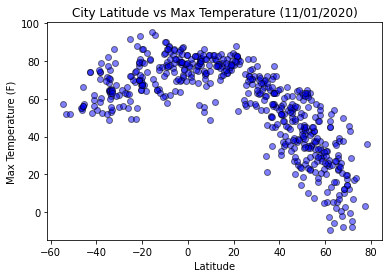

In [16]:
#  Plotting the Data

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as temperature drops as you move away from the equator")
plt.savefig("../Latitude_Max_Temp.png")

The plot shows that there is no real pattern describing the relationship between latitude and humidity


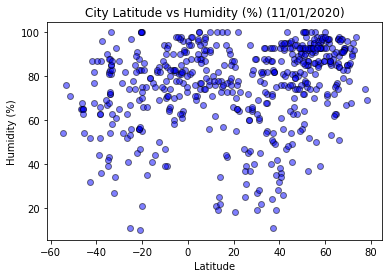

In [17]:
#  Latitude vs. Humidity Plot
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern describing the relationship between latitude and humidity")
plt.savefig("../Latitude_Humidity.png")

The plot shows that the relationship between Cloudiness and Latitude is all over the place and no real pattern can be discerned


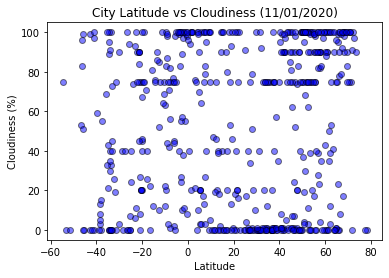

In [18]:
#  Latitude vs. Cloudiness Plot

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that the relationship between Cloudiness and Latitude is all over the place and no real pattern can be discerned")
plt.savefig("../Latitude_Cloudiness.png")

The plot shows that the relationship between Wind Speed and Latitude is all over the place and no real pattern can be discerned


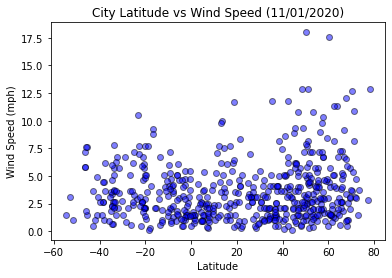

In [19]:
# Latitude vs. Wind Speed Plot


today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that the relationship between Wind Speed and Latitude is all over the place and no real pattern can be discerned")
plt.savefig("../Latitude_Wind_Speed.png")

In [20]:
#  Linear Regression

In [21]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

Regression line equation is: y = -0.98x + 89.69
The r-value is: -0.8373515140199975
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


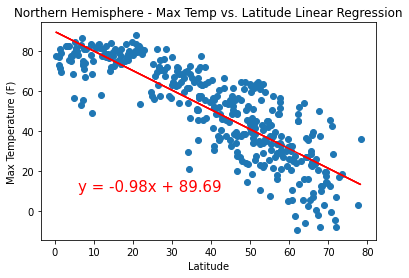

<Figure size 432x288 with 0 Axes>

In [22]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()
plt.savefig("../Latitude_Max_Temp_Linear_North.png")

In [23]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.8373515140199975


Regression line equation is: y = 0.45x + 80.54
The r-value is: 0.5772280038515942
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


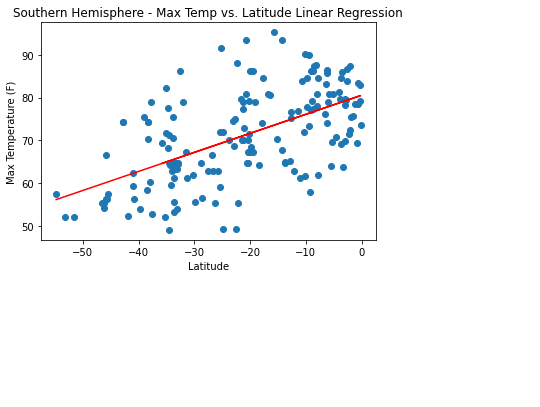

<Figure size 432x288 with 0 Axes>

In [24]:
#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()
plt.savefig("../Latitude_Max_Temp_Linear_South.png")

In [25]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.5772280038515942


Regression line equation is: y = 0.2x + 69.61
The r-value is: 0.20281155920380503
The regression does not display much of a correlation between the data sets.


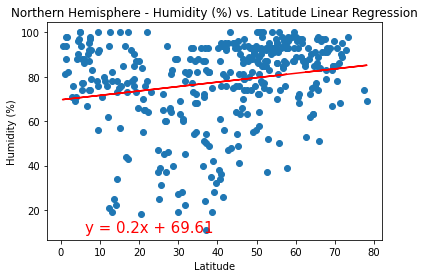

<Figure size 432x288 with 0 Axes>

In [26]:
#  Northern Hemisphere - Humidity vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()
plt.savefig("../Latitude_Humidity_North.png")

In [27]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.20281155920380503


Regression line equation is: y = 0.33x + 78.75
The r-value is: 0.2554276394391994
The regression does not display much of a correlation between the data sets.


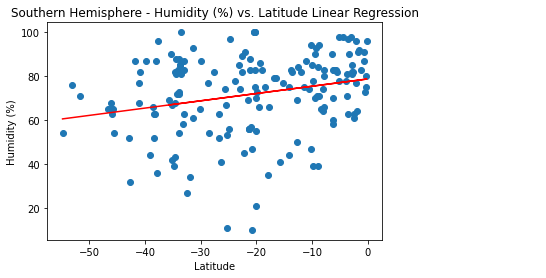

<Figure size 432x288 with 0 Axes>

In [28]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("../Latitude_Humidity_South.png")

In [29]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.2554276394391994


Regression line equation is: y = 0.39x + 36.19
The r-value is: 0.187561746802927
The regression does not display much of a correlation between the data sets.


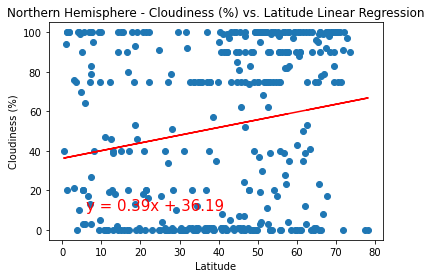

<Figure size 432x288 with 0 Axes>

In [30]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("../Latitude_Cloudiness_North.png")

In [31]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.187561746802927


Regression line equation is: y = 0.8x + 68.93
The r-value is: 0.3034493228947647
The regression does not display much of a correlation between the data sets.


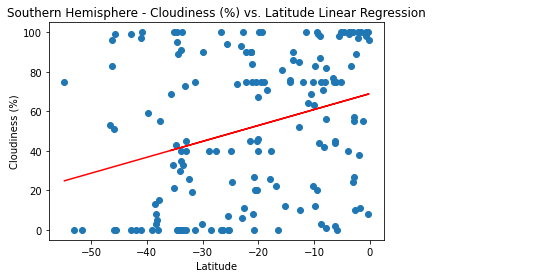

<Figure size 432x288 with 0 Axes>

In [32]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("../Latitude_Cloudiness_South.png")

In [33]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.3034493228947647


Regression line equation is: y = 0.03x + 2.38
The r-value is: 0.21978557951344715
The regression does not display much of a correlation between the data sets.


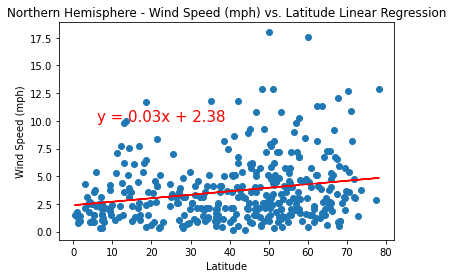

<Figure size 432x288 with 0 Axes>

In [34]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("../Latitude_Wind_North.png")

In [35]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.21978557951344715


Regression line equation is: y = -0.02x + 3.07
The r-value is: -0.10161489232159336
The regression does not display much of a correlation between the data sets.


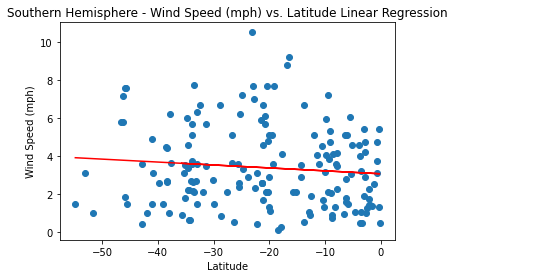

<Figure size 432x288 with 0 Axes>

In [36]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("../Latitude_Wind_South.png")

In [37]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.10161489232159336
